In [14]:
# This is query for the Assortative Coefficient template
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [15]:
# Path for all the results
path="/mnt/indexer-build/migrated_data/curated/powerlaw_revised/"
path_casper="/mnt/indexer-build/migrated_data/casper_data/curated/powerlaw_revised/"

In [16]:
def extractorYear(year):
    return(int(str(year)[:4]))

def extractorWeek(year):
    return(int(str(year)[4:]))

In [17]:
all_files = glob.glob(path + "/*/*.csv")
all_files_casper = glob.glob(path_casper + "/*/*.csv")

li = []
li_casper = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

for filename in all_files_casper:
    df_one = pd.read_csv(filename, index_col=None, header=0)
    li_casper.append(df_one)

frame = pd.concat(li, axis=0, ignore_index=True)
frame_casper = pd.concat(li_casper, axis=0, ignore_index=True)

In [18]:
frame_casper["year"]=frame_casper.time_week.apply(extractorYear)
frame_casper["week"]=frame_casper.time_week.apply(extractorWeek)
final2 = frame_casper.sort_values(by=['year','week'])

In [19]:
frame["year"]=frame.time_week.apply(extractorYear)
frame["week"]=frame.time_week.apply(extractorWeek)
final1 = frame.sort_values(by=['year','week'])

In [20]:
extra = final1[((final1.year == 2018) & (final1.week < 26)) | ((final1.year == 2022) & (final1.week > 34))]
extra

,powerlaw_alpha,exponential_fit_p,trucatedpower_fit_p,lognormal_fit_p,exponential_fit_r,trucatedpower_fit_r,lognormal_fit_r,time_week,year,week
164,1.599114,6.477865e-05,0.020855,0.000015,3.994691,-2.669432,-0.599554,20181,2018,1
145,2.545612,1.804495e-17,0.000591,0.130132,8.505734,-5.902200,-13.153742,202252,2022,52


In [21]:
extra2 = final2[((final2.year == 2018) & (final2.week < 26)) | ((final2.year == 2022) & (final2.week > 34))]
extra2

,powerlaw_alpha,exponential_fit_p,trucatedpower_fit_p,lognormal_fit_p,exponential_fit_r,trucatedpower_fit_r,lognormal_fit_r,time_week,year,week
35,3.468716,6.445662e-02,9.999824e-01,0.319212,1.849008,2.423173e-10,-5.928541,202235,2022,35
1,1.597590,8.287699e-01,5.021299e-02,0.320977,0.216279,-1.917166e+00,-1.219141,202236,2022,36
60,1.597179,8.395900e-01,2.944785e-02,0.314292,-0.202418,-2.370620e+00,-1.500480,202237,2022,37
30,1.907149,1.244031e-10,7.914813e-01,0.303234,6.433860,-3.495040e-02,-5.658729,202238,2022,38
53,1.621126,2.669620e-01,1.177547e-01,0.597357,1.110086,-1.223467e+00,-0.368660,202239,2022,39
22,1.550844,5.950803e-01,4.320586e-02,0.385462,0.531489,-2.043665e+00,-1.009101,202240,2022,40
8,1.513420,8.405251e-01,9.959674e-03,0.180380,-0.201222,-3.321048e+00,-2.321683,202241,2022,41
50,1.644487,3.674673e-02,1.405381e-01,0.730474,2.088567,-1.086029e+00,-0.115674,202242,2022,42
23,2.534059,1.141178e-04,3.883918e-01,0.192213,3.858430,-3.719855e-01,-3.768294,202243,2022,43
18,2.120405,3.165328e-03,3.388612e-11,0.000008,2.951209,-2.196924e+01,-26.883547,202252,2022,52


In [22]:
df = pd.merge(final1, extra, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
df2 = pd.merge(final2, extra2, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [23]:
df1 = df[(df['exponential_fit_p'] > 0.1) & (df['exponential_fit_r'] >= 0)]
df1

,powerlaw_alpha,exponential_fit_p,trucatedpower_fit_p,lognormal_fit_p,exponential_fit_r,trucatedpower_fit_r,lognormal_fit_r,time_week,year,week
4,1.422357,0.246630,0.339604,0.754237,1.158573,-4.559624e-01,-0.125846,201829,2018,29
5,2.090595,0.150986,0.000000,0.007135,1.436056,-5.031430e+01,-51.806712,201830,2018,30
6,2.155713,0.149253,0.000000,0.000008,1.442175,-5.004995e+01,-45.975809,201831,2018,31
11,1.584074,0.150380,0.527282,0.813250,1.438191,-1.998134e-01,-0.038942,201836,2018,36
14,1.596850,0.257933,0.446493,0.793122,1.131291,-2.897700e-01,-0.057354,201839,2018,39
17,3.713974,0.167872,0.999935,0.280314,1.379072,3.306867e-09,-5.057157,201842,2018,42
19,2.410279,0.243532,0.918189,0.319365,1.166205,-5.275144e-03,-5.170538,201844,2018,44
23,3.468722,0.152905,0.999907,0.292600,1.429344,6.850776e-09,-5.468393,201848,2018,48
26,2.916125,0.360971,0.816863,0.990061,0.913516,-2.681509e-02,0.000051,201851,2018,51
27,3.328322,0.137826,0.999832,0.324481,1.483937,-2.220032e-08,-5.532775,201852,2018,52


In [24]:
df3 = df2[(df2['exponential_fit_p'] > 0.1) & (df2['exponential_fit_r'] >= 0)]
df3

,powerlaw_alpha,exponential_fit_p,trucatedpower_fit_p,lognormal_fit_p,exponential_fit_r,trucatedpower_fit_r,lognormal_fit_r,time_week,year,week
0,NaN,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,202117,2021,17
1,2.398758,0.412919,0.544594,0.690601,0.818768,-1.835458e-01,-0.189387,202118,2021,18
4,2.179473,0.756770,0.524649,0.864124,0.309725,-2.023726e-01,-0.044816,202121,2021,21
9,1.946045,0.243846,0.489845,0.770773,1.165428,-2.384336e-01,-0.080811,202126,2021,26
13,2.644325,0.136649,0.892632,0.288795,1.488385,-9.108999e-03,-5.203794,202130,2021,30
14,2.172168,0.601286,0.511706,0.780958,0.522552,-2.152886e-01,-0.098192,202131,2021,31
15,2.184183,0.463381,0.558591,0.854118,0.733290,-1.710750e-01,-0.040332,202132,2021,32
16,2.032159,0.257497,0.673473,0.956701,1.132326,-8.878320e-02,-0.002934,202133,2021,33
17,2.307123,0.529037,0.582532,0.775288,0.629476,-1.510796e-01,-0.080823,202134,2021,34
23,1.515415,0.147619,0.087254,0.576158,1.447994,-1.462158e+00,-0.442964,202140,2021,40


In [13]:
# Readings for Tezos
print("Min Alpha value :"+str(df1['powerlaw_alpha'].min()))
print("Max Alpha value :"+str(df1['powerlaw_alpha'].max()))
print("1. Quatile Alpha value :"+str(df1['powerlaw_alpha'].quantile(.1)))
print("3. Quatile Alpha value :"+str(df1['powerlaw_alpha'].quantile(.3)))
print("Median Alpha value :"+str(df1['powerlaw_alpha'].median()))

Min Alpha value :1.4223570639487677
Max Alpha value :4.493106412336182
1. Quatile Alpha value :1.9890631308654032
3. Quatile Alpha value :2.387929335472723
Median Alpha value :2.6530973171943097


In [25]:
# Readings for Casper
print("Min Alpha value :"+str(df3['powerlaw_alpha'].min()))
print("Max Alpha value :"+str(df3['powerlaw_alpha'].max()))
print("1. Quatile Alpha value :"+str(df3['powerlaw_alpha'].quantile(.1)))
print("3. Quatile Alpha value :"+str(df3['powerlaw_alpha'].quantile(.3)))
print("Median Alpha value :"+str(df3['powerlaw_alpha'].median()))

Min Alpha value :1.5056741044842266
Max Alpha value :6.5932319112416575
1. Quatile Alpha value :1.518699187612322
3. Quatile Alpha value :1.5998475365807492
Median Alpha value :1.894179428510308


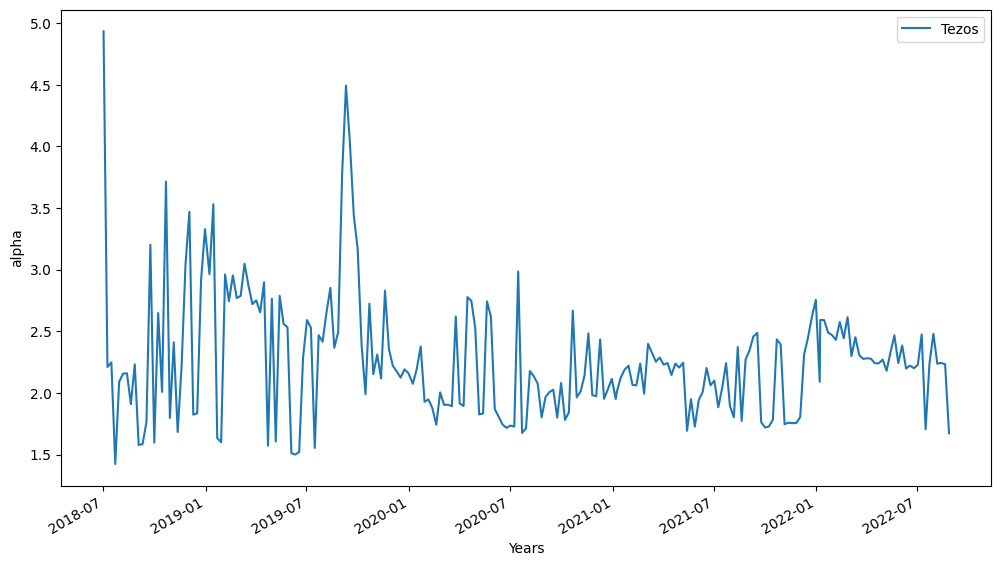

In [12]:
# Determine the date
df['date'] = pd.to_datetime(df.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(df.week*7, unit='days')

# Plot
fig, ax = plt.subplots()
df.plot(x='date', y='powerlaw_alpha', ax=ax, figsize=(12,7))
ax.set_xlabel('Years')
ax.set_ylabel('alpha')
ax.legend(['Tezos'])

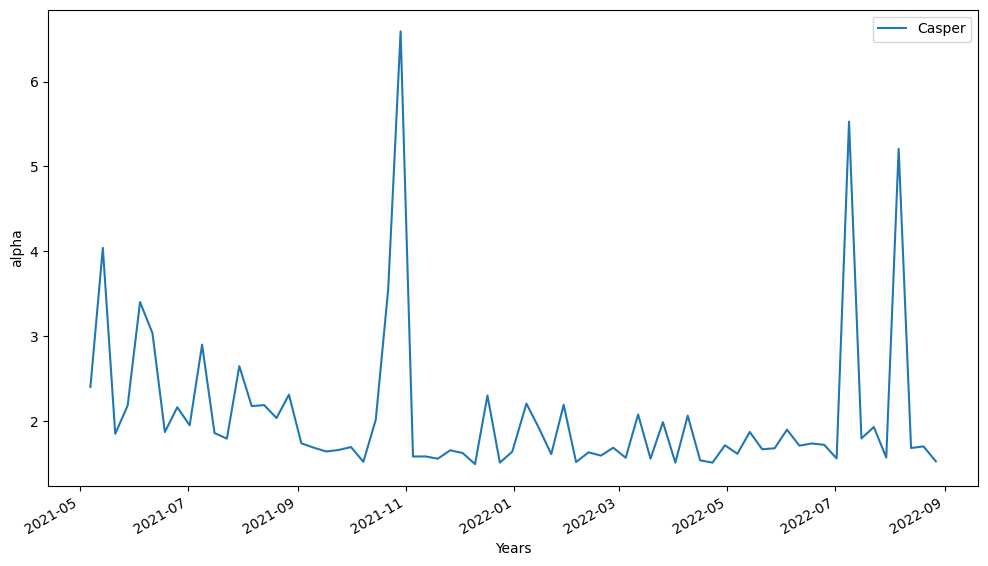

In [13]:
# Determine the date
df2['date'] = pd.to_datetime(df2.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(df2.week*7, unit='days')

# Plot
fig, ax = plt.subplots()
df2.plot(x='date', y='powerlaw_alpha', ax=ax, figsize=(12,7))
ax.set_xlabel('Years')
ax.set_ylabel('alpha')
ax.legend(['Casper'])